In [182]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind, chi2_contingency, f_oneway
from scipy.stats import mannwhitneyu, fisher_exact, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pingouin as pg
import scikit_posthocs as sp

# 출력 설정
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 시드 설정
np.random.seed(42) # 팀원간의 결과물이 동일하게 보일 수 있음

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


In [183]:
import os
os.chdir(r"C:\Users\lizzy\OneDrive\바탕 화면\실전프로젝트\code\eda")  # 작업 디렉토리로 변경
print(os.getcwd())  # 잘 바뀌었는지 확인

C:\Users\lizzy\OneDrive\바탕 화면\실전프로젝트\code\eda


In [184]:
import pandas as pd

df_energy = pd.read_csv('검정성적.csv', encoding='euc-kr')



UnicodeDecodeError: 'euc_kr' codec can't decode byte 0x80 in position 5: illegal multibyte sequence

In [ ]:
print(df_energy.shape)
print(df_growth.shape)
print(df_environment.shape)
print(df_produce.shape)

(280, 12)
(48, 13)
(30867570, 7)
(264, 4)


In [ ]:
import pandas as pd

# 행, 열 모두 제한 해제
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 출력 폭 제한 해제 (너비)
pd.set_option('display.width', None)

# 한 셀 안에서 문자열이 잘리는 경우
pd.set_option('display.max_colwidth', None)


# DataFrame 출력
print(df_produce.loc[df_produce['itemGrade'] == '2등급', ['farm_cde', 'itemGrade', 'outtrn']])



    farm_cde itemGrade  outtrn
44      천지인술       2등급     NaN
45      천지인술       2등급     NaN
46      천지인술       2등급     NaN
47      천지인술       2등급     NaN
48      천지인술       2등급     NaN
49      천지인술       2등급   0.200
50      천지인술       2등급   0.420
51      천지인술       2등급   0.380
52      천지인술       2등급   1.840
53      천지인술       2등급   1.640
54      천지인술       2등급   8.700
55   Trigger       2등급   0.206
56   Trigger       2등급   2.350
57   Trigger       2등급   5.650
58   Trigger       2등급   6.030
59   Trigger       2등급   1.150
60   Trigger       2등급   3.240
61   Trigger       2등급   2.200
62   Trigger       2등급   4.480
63   Trigger       2등급   3.440
64   Trigger       2등급   2.060
65   Trigger       2등급   3.680
66  이삭줍는 알파고       2등급     NaN
67  이삭줍는 알파고       2등급   0.390
68  이삭줍는 알파고       2등급   1.700
69  이삭줍는 알파고       2등급   2.710
70  이삭줍는 알파고       2등급   2.560
71  이삭줍는 알파고       2등급   0.620
72  이삭줍는 알파고       2등급   1.260
73  이삭줍는 알파고       2등급   3.480
74  이삭줍는 알파고       2등급   3.300
75  이삭줍는

##### 에너지사용정보 형태확인(결측치 있음, 중복값 있음)

In [ ]:
df_energy.isnull().sum()    

measDate                0
farm_cde                0
water_usage             0
water_cost              0
fertilizer_usage        0
fertilizer_cost         0
heating_energy_usage    0
heating_energy_cost     0
CO2_usage               0
CO2_cost                0
mist_usage_time         0
mist_cost               0
dtype: int64

In [ ]:
#중복값
df_energy.duplicated().sum()

np.int64(0)

In [ ]:
df_energy['farm_cde'].unique()

array(['천지인술', 'Trigger', '이삭줍는 알파고', '토마토명가'], dtype=object)

##### 환경정보 형태확인(결측치 있음, 중복값 있음)

In [ ]:
df_environment.isnull().sum()

farm_cde       0
measDate       0
itemCode       0
sectCode       0
classCode      0
fatrCode       0
senVal       880
dtype: int64

In [ ]:
print(df_environment.duplicated().sum())

6645907


##### 생육정보 형태확인(결측치 있음, 중복값 있음)

In [ ]:
df_growth.isnull().sum()

measDate       0
farm_cde       0
itemCode       1
flowerTop      3
grwtLt         1
lefCunt        4
lefLt          4
lefBt          3
stemThck       1
flanGrupp      4
frtstGrupp     4
hvstGrupp      4
frtstCo       15
dtype: int64

In [ ]:
df_growth.duplicated().sum()

np.int64(0)

##### 생산정보 형태확인(결측치 있음, 중복값 있음)

In [ ]:
df_produce.isnull().sum()

measDate      0
farm_cde      0
itemGrade     0
outtrn       57
dtype: int64

In [ ]:
df_produce.duplicated().sum()

np.int64(0)

# 생산정보 전처리

In [ ]:
df_produce_clean = df_produce.copy() 
df_produce_clean['outtrn'] = df_produce_clean['outtrn'].fillna(0)

In [ ]:
df_produce_clean.isnull().sum()

measDate     0
farm_cde     0
itemGrade    0
outtrn       0
dtype: int64

In [ ]:
# CSV 파일로 저장 (인덱스 제외)
df_growth_clean.to_csv("df_produce_clean.csv", index=False, encoding="utf-8-sig")


# 환경정보 테이블 전처리

In [ ]:
df_environment['senVal'].dtypes

dtype('O')

In [ ]:
df_environment_clean = df_environment.copy()

In [ ]:
#숫자형이 아닌 값 추출
mask_non_numeric = df_environment_clean['senVal'].apply(
    lambda x: isinstance(x, str) and pd.isna(pd.to_numeric(x, errors='coerce'))
)
df_environment_clean[mask_non_numeric]


,farm_cde,measDate,itemCode,sectCode,classCode,fatrCode,senVal
4370301,천지인술,2022-11-01 00:00:00,80300,NT,FG,PO,-
4742604,천지인술,2022-11-04 00:00:00,80300,NT,FG,EO,배액 없음
4742605,천지인술,2022-11-04 00:00:00,80300,NT,FG,PO,배액 없음
4869288,천지인술,2022-11-05 00:00:00,80300,NT,FG,PO,배액 없음
4869290,천지인술,2022-11-05 00:00:00,80300,NT,FG,EO,배액 없음
5122469,천지인술,2022-11-07 00:00:00,80300,NT,FG,PO,배액 없음
5122470,천지인술,2022-11-07 00:00:00,80300,NT,FG,EO,배액 없음
5248747,천지인술,2022-11-08 00:00:00,80300,NT,FG,PO,배액 없음
5248748,천지인술,2022-11-08 00:00:00,80300,NT,FG,EO,배액 없음
5375020,천지인술,2022-11-09 00:00:00,80300,NT,FG,EO,배액 없음


In [ ]:
df_environment_clean.loc[mask_non_numeric, 'senVal'].unique()


array(['-', '배액 없음', '배액없음', '4.2(거의없음)', '3.8(거의 없음)'], dtype=object)

In [ ]:
df_environment_clean[mask_non_numeric].count()

farm_cde     27
measDate     27
itemCode     27
sectCode     27
classCode    27
fatrCode     27
senVal       27
dtype: int64

In [ ]:
print(df_environment_clean['senVal'].isnull().sum())

880


In [ ]:
df_environment_clean['senVal'].apply(type).value_counts()

senVal
<class 'float'>    29949956
<class 'str'>        917614
Name: count, dtype: int64

In [ ]:
# 'senVal'컬럼의 값이 '4.2(거의없음)', '3.8(거의 없음)'인 행 숫자형태로 변환
df_environment_clean['senVal'] = df_environment_clean['senVal'].replace(
    {'4.2(거의없음)': '4.2',
     '3.8(거의 없음)': '3.8'})
df_environment_clean.loc[[29337963, 29798398], 'senVal']


29337963    4.2
29798398    3.8
Name: senVal, dtype: object

In [ ]:
# 'senVal'컬럼의 값이 '-', '배액 없음', '배액없음'인 행(drop 조건) 제거
df_environment_clean = df_environment_clean[~df_environment_clean['senVal'].isin(['-', '배액 없음', '배액없음'])]

In [ ]:
#'senVal'컬럼에서 문자열인 행 제거 완료
print(df_environment_clean['senVal'].isin(['-', '배액 없음', '배액없음']).sum())

0


In [ ]:
df_environment_clean['senVal'] = pd.to_numeric(df_environment_clean['senVal'], errors='coerce')
df_environment_clean['senVal'].dtype


dtype('float64')

### 중복값 제거

In [ ]:
df_environment_clean.duplicated().sum() 

KeyboardInterrupt: 

In [ ]:
df_environment_clean = df_environment_clean.drop_duplicates().reset_index(drop=True)
df_environment_clean.duplicated().sum()

np.int64(0)

### nan 값 채우기

In [ ]:
# 1. measDate를 datetime으로 변환
df_environment_clean['measDate'] = pd.to_datetime(df_environment_clean['measDate'], errors='coerce')

# 2. fatrCode별, measDate 순으로 정렬
df_environment_clean = df_environment_clean.sort_values(['fatrCode', 'measDate'])

# 3. 그룹별로 선형 보간 (앞뒤 값의 직선 보간 → 사실상 평균과 유사)
df_environment_clean['senVal'] = (
    df_environment_clean.groupby('fatrCode')['senVal']
    .transform(lambda g: g.interpolate(method='linear').ffill().bfill())
)


df_environment_clean.isna().sum()


farm_cde     0
measDate     0
itemCode     0
sectCode     0
classCode    0
fatrCode     0
senVal       0
dtype: int64

In [ ]:
# itemCode, classCode 컬럼 삭제
df_environment_clean = df_environment_clean.drop(columns=['itemCode', 'classCode'])


In [ ]:
df_environment_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24221585 entries, 6038572 to 12179350
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   farm_cde  object        
 1   measDate  datetime64[ns]
 2   sectCode  object        
 3   fatrCode  object        
 4   senVal    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.1+ GB


# 생육정보 전처리

In [ ]:
df_growth = pd.read_csv('생육정보.csv', encoding='euc-kr')

In [ ]:
df_growth.isnull().sum()

measDate       0
farm_cde       0
itemCode       1
flowerTop      3
grwtLt         1
lefCunt        4
lefLt          4
lefBt          3
stemThck       1
flanGrupp      4
frtstGrupp     4
hvstGrupp      4
frtstCo       15
dtype: int64

In [ ]:
df_growth[df_growth['frtstCo'].isnull()]


,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.00,NaN,20.0,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
12,2022-09-26,Trigger,80300.00,NaN,20.0,NaN,NaN,NaN,7.620,NaN,NaN,NaN,NaN
24,2022-09-26,이삭줍는 알파고,NaN,200.00,NaN,NaN,NaN,8.480,NaN,NaN,NaN,NaN,NaN
25,2022-10-04,이삭줍는 알파고,23.79,24.65,7.8,32.270,22.27,9.680,0.200,0.000,0.00,0.0,NaN
26,2022-10-10,이삭줍는 알파고,20.03,19.39,11.2,32.590,26.06,9.780,1.380,0.840,0.00,4.2,NaN
27,2022-10-17,이삭줍는 알파고,17.91,22.69,13.4,26.923,23.04,9.676,2.320,1.880,0.00,8.3,NaN
28,2022-10-24,이삭줍는 알파고,23.20,16.54,14.7,29.840,24.74,8.394,3.020,2.540,0.00,10.5,NaN
29,2022-10-31,이삭줍는 알파고,19.44,15.18,17.1,28.620,23.82,6.466,3.880,3.140,0.00,13.3,NaN
30,2022-11-07,이삭줍는 알파고,12.35,11.45,19.6,26.290,20.97,5.136,4.320,3.860,0.00,17.0,NaN
31,2022-11-14,이삭줍는 알파고,28.15,14.28,19.9,28.350,22.45,7.252,4.820,4.560,0.00,21.1,NaN


In [ ]:
df_growth

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.00,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.00,21.92,28.32,8.500,38.35,26.330,9.600,0.540,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.00,24.51,21.71,10.500,40.18,29.040,9.992,1.320,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.00,20.02,26.40,13.200,42.72,38.450,12.529,2.280,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.00,33.93,26.17,13.900,45.76,43.020,10.842,2.960,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.00,23.01,19.19,13.700,41.69,37.220,9.175,3.960,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.00,17.14,18.28,14.400,37.19,34.480,9.019,4.460,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.00,15.78,9.04,14.000,38.04,30.360,6.585,5.200,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.00,22.99,14.75,15.800,39.91,39.010,7.371,5.340,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.00,38.93,19.61,14.100,40.48,42.080,8.802,5.360,5.24,0.08,19.8


In [ ]:
df_growth = pd.read_csv('생육정보.csv', encoding='euc-kr')


In [ ]:
df_growth_clean = df_growth.copy()

In [ ]:
# measDate가 datetime이 아니라 문자열이라면 먼저 변환
df_growth_clean['measDate'] = pd.to_datetime(df_growth_clean['measDate'], errors='coerce')

# 2022-09-26인 행 제거
df_growth_clean = df_growth_clean[df_growth_clean['measDate'] != '2022-09-26']

In [ ]:
df_growth_clean

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
1,2022-10-04,천지인술,80300.00,21.92,28.32,8.500,38.35,26.330,9.600,0.540,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.00,24.51,21.71,10.500,40.18,29.040,9.992,1.320,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.00,20.02,26.40,13.200,42.72,38.450,12.529,2.280,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.00,33.93,26.17,13.900,45.76,43.020,10.842,2.960,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.00,23.01,19.19,13.700,41.69,37.220,9.175,3.960,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.00,17.14,18.28,14.400,37.19,34.480,9.019,4.460,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.00,15.78,9.04,14.000,38.04,30.360,6.585,5.200,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.00,22.99,14.75,15.800,39.91,39.010,7.371,5.340,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.00,38.93,19.61,14.100,40.48,42.080,8.802,5.360,5.24,0.08,19.8
10,2022-12-05,천지인술,80300.00,44.61,22.31,11.600,41.97,45.320,8.812,6.140,5.70,0.78,13.7


### 확실히 밀린 것이라 판단! '이삭줍는 알파고' 데이터 밀기

In [ ]:
# 1. 대상 컬럼 순서 정의 (왼쪽→오른쪽으로 밀릴 순서)
cols = [
    'itemCode', 'flowerTop', 'grwtLt', 'lefCunt', 'lefLt',
    'lefBt', 'stemThck', 'flanGrupp', 'frtstGrupp', 'hvstGrupp'
]

# 2. '이삭줍는 알파고' 행만 선택
mask = df_growth_clean['farm_cde'] == '이삭줍는 알파고'

# 3. 해당 행에서 값들을 오른쪽으로 한 칸씩 shift
df_growth_clean.loc[mask, cols[1:] + ['frtstCo']] = (
    df_growth_clean.loc[mask, cols].values
)
df_growth_clean.loc[mask, 'itemCode'] = 80300.00

df_growth_clean.loc[mask]

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
25,2022-10-04,이삭줍는 알파고,80300.0,23.79,24.65,7.8,32.270,22.27,9.680,0.20,0.000,0.00,0.0
26,2022-10-10,이삭줍는 알파고,80300.0,20.03,19.39,11.2,32.590,26.06,9.780,1.38,0.840,0.00,4.2
27,2022-10-17,이삭줍는 알파고,80300.0,17.91,22.69,13.4,26.923,23.04,9.676,2.32,1.880,0.00,8.3
28,2022-10-24,이삭줍는 알파고,80300.0,23.20,16.54,14.7,29.840,24.74,8.394,3.02,2.540,0.00,10.5
29,2022-10-31,이삭줍는 알파고,80300.0,19.44,15.18,17.1,28.620,23.82,6.466,3.88,3.140,0.00,13.3
30,2022-11-07,이삭줍는 알파고,80300.0,12.35,11.45,19.6,26.290,20.97,5.136,4.32,3.860,0.00,17.0
31,2022-11-14,이삭줍는 알파고,80300.0,28.15,14.28,19.9,28.350,22.45,7.252,4.82,4.560,0.00,21.1
32,2022-11-21,이삭줍는 알파고,80300.0,16.08,14.35,19.4,29.720,21.93,6.162,5.50,4.820,0.26,19.1
33,2022-11-28,이삭줍는 알파고,80300.0,20.65,16.30,18.0,31.330,25.64,7.453,6.00,5.305,0.56,21.7
34,2022-12-05,이삭줍는 알파고,80300.0,24.69,17.32,17.0,33.160,27.57,7.744,6.58,6.300,1.20,15.7


### 원본이미지

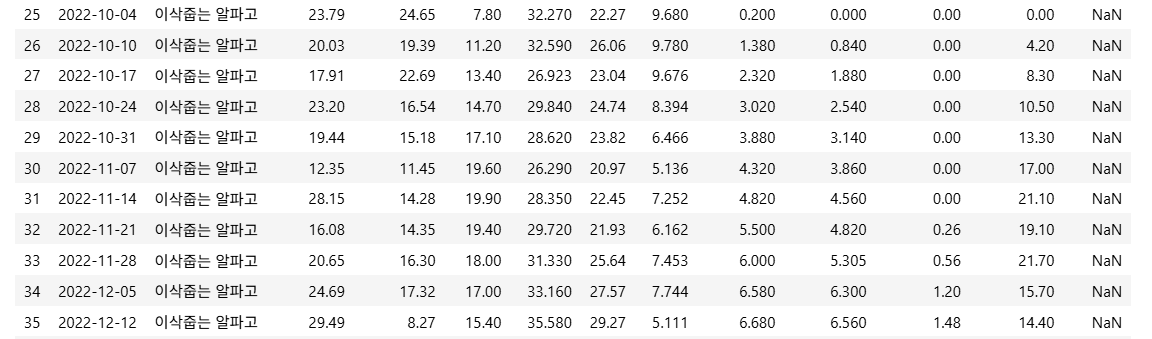